# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)

test_data, test_labels = newsgroups_test.data[round(num_test/2):], newsgroups_test.target[round(num_test/2):]
dev_data, dev_labels = newsgroups_test.data[:round(num_test/2)], newsgroups_test.target[:round(num_test/2)]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print ('training label shape:', train_labels.shape)
print ('test label shape:', test_labels.shape)
print ('dev label shape:', dev_labels.shape)
print ('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

[2 pts]

In [3]:
def P1(num_examples=5):
### STUDENT START ###

# loop the number of examples required for each label

    for i in range(0, num_examples):
        print("\nData: \n")
        print(train_data[i])
        print("\nLabel: \n")
        print(newsgroups_train.target_names[train_labels[i]])

    return
### STUDENT END ###
P1(2)


Data: 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

Label: 

comp.graphics

Data: 



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

Label: 

talk.reli

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

[6 pts]

In [4]:
#def P2():
### STUDENT START ###

# Part a:

print("Part a")

vectorizer1 = CountVectorizer()

# turn the raw training text into feature vectors

fit = vectorizer1.fit(train_data)

print("No of vocabulary :", len(fit.vocabulary_))

# converts the raw text into feature vectors

transform = vectorizer1.fit_transform(train_data)

print("Average number of non-zero features per example :", transform.shape[1] / transform.shape[0])

print("Fraction of the non-zero entries :", transform.nnz / (transform.shape[0] * transform.shape[1]), '\n')

# Part b:

print("Part b")
print("0th feature string :", vectorizer1.get_feature_names()[0])
print("last feature string :", vectorizer1.get_feature_names()[-1], '\n')

# Part c:

print("Part c")

vocab = ["atheism", "graphics", "space", "religion"]

vectorizer2 = CountVectorizer(vocabulary = vocab)

transform2 = vectorizer2.fit_transform(train_data)

print("Average number of non-zero features per example :", transform2.shape[1] / transform2.shape[0], '\n')

# Part d:

print("Part d")

vectorizer3 = CountVectorizer(analyzer = 'word', ngram_range = (2, 3))

vectorizer3.fit_transform(train_data)

print("No of vocabulary :", len(vectorizer3.vocabulary_), '\n')

# Part e:

print("Part e")

vectorizer4 = CountVectorizer(min_df = 10)

vectorizer4.fit_transform(train_data)

print("No of vocabulary :", len(vectorizer4.vocabulary_), '\n')

# Part f:

print("Part f")

train_vectorizer = CountVectorizer().fit(train_data)
dev_vectorizer = CountVectorizer().fit(dev_data)

print("No of vocabulary in train data :", len(train_vectorizer.vocabulary_))
print("No of vocabulary in dev data :", len(dev_vectorizer.vocabulary_))

diff = set(dev_vectorizer.vocabulary_.keys()) - set(train_vectorizer.vocabulary_.keys())

print("Fraction of words in the dev data are missing from the vocabulary :", len(diff) / len(dev_vectorizer.vocabulary_))

### STUDENT END ###
#P2()

Part a
No of vocabulary : 26879
Average number of non-zero features per example : 13.214847590953786
Fraction of the non-zero entries : 0.0035978272269590263 

Part b
0th feature string : 00
last feature string : zyxel 

Part c
Average number of non-zero features per example : 0.0019665683382497543 

Part d
No of vocabulary : 510583 

Part e
No of vocabulary : 3064 

Part f
No of vocabulary in train data : 26879
No of vocabulary in dev data : 16246
Fraction of words in the dev data are missing from the vocabulary : 0.24787640034470024


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

[4 pts]

In [56]:
#def P3():
### STUDENT START ###

train_vectorizer = CountVectorizer()

transformed_train = train_vectorizer.fit_transform(train_data)
transformed_test = CountVectorizer(vocabulary = train_vectorizer.get_feature_names()).transform(test_data)

print("KNN classifier")

KNN_parameter = dict(n_neighbors = list(range(1, 10)))

gridKNN = GridSearchCV(KNeighborsClassifier(), KNN_parameter, cv=10, scoring='f1_weighted')

gridKNN.fit(transformed_train, train_labels)

print("Optimal value for k :", gridKNN.best_params_.get("n_neighbors"))

print("F1 score :", metrics.f1_score(test_labels, gridKNN.predict(transformed_test), average = 'weighted'))

print("The reason for poor result using KNN classifier is because of the curse of dimentionality", "\n")

print("Multinomial Naive Bayes Model")

MNB_parameter = dict(alpha = list(np.arange(0.01, 1, 0.01)))

gridMNB = GridSearchCV(MultinomialNB(), MNB_parameter, cv=10, scoring='f1_weighted')

gridMNB.fit(transformed_train, train_labels)

print("Optimal value for alpha :", gridMNB.best_params_.get("alpha"))

print("F1 score :", metrics.f1_score(test_labels, gridMNB.predict(transformed_test), average = 'weighted'), "\n")

print("Naive Bayes is a learning algorithm with greater bias, but lower variance, than Logistic Regression. If this bias is appropriate given the actual data, Naive Bayes will be preferred. Otherwise, Logistic Regression will be preferred", "\n")

print("Logistic Regression Model")

LR_parameter = dict(C = list(np.arange(1, 2, 0.5)))

gridLR = GridSearchCV(LogisticRegression(), LR_parameter, cv=10, scoring='f1_weighted')

gridLR.fit(transformed_train, train_labels)

print("Optimal value for C :", gridLR.best_params_.get("C"))

print("F1 score :", metrics.f1_score(test_labels, gridLR.predict(transformed_test), average = 'weighted'))

squared_df = np.square(pd.DataFrame(gridLR.best_estimator_.coef_))
squared_df['sum'] = squared_df[list(squared_df.columns)].sum(axis=1)

print(squared_df['sum'])
print("For smaller C, the sum of square of weight is smaller.")

### STUDENT END ###
#P3()

KNN classifier
Optimal value for k : 8
F1 score : 0.408468893248
The reason for poor result using KNN classifier is because of the curse of dimentionality 

Multinomial Naive Bayes Model
Optimal value for alpha : 0.02
F1 score : 0.780798563998 

Naive Bayes is a learning algorithm with greater bias, but lower variance, than Logistic Regression. If this bias is appropriate given the actual data, Naive Bayes will be preferred. Otherwise, Logistic Regression will be preferred 

Logistic Regression Model
Optimal value for C : 1.0
F1 score : 0.734394155806
0    166.884671
1    130.926006
2    157.944895
3    145.720171
Name: sum, dtype: float64
For smaller C, the sum of square of weight is smaller.


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

[5 pts]

In [6]:
#def P4():
### STUDENT START ###

train_vectorizer = CountVectorizer()

transformed_train = train_vectorizer.fit_transform(train_data)

LR = LogisticRegression().fit(transformed_train, train_labels)

coefficient = pd.DataFrame(LR.coef_)
coefficient.columns = train_vectorizer.get_feature_names()

### STUDENT END ###
#P4()

In [7]:
#pd.DataFrame.from_records(train_vectorizer.get_feature_names())
test = pd.DataFrame(LR.coef_)
test.columns = train_vectorizer.get_feature_names()

In [8]:
# make all number positives

def mul(x, y):
    if x <0:
        return pd.to_numeric(x) * y
    else:
        return x
    
test_abs = test

test_abs = test_abs.applymap(lambda x: mul(x, -1))

In [9]:
# sum the top 5 feature for each of the label

first = test_abs[test_abs.iloc[0].sort_values(ascending = False).index]
second = test_abs[test_abs.iloc[1].sort_values(ascending = False).index]
third = test_abs[test_abs.iloc[2].sort_values(ascending = False).index]
last = test_abs[test_abs.iloc[3].sort_values(ascending = False).index]

# join first and second
first_two = pd.concat([first.iloc[:,0:5], second.iloc[:,0:5]], axis = 1)

# join third and last
last_two = pd.concat([third.iloc[:,0:5], last.iloc[:,0:5]], axis = 1)

#join everything
top_20_feature =  pd.concat([first_two, last_two], axis=1)
top_20_feature.T

,0,1,2,3
space,1.259968,1.316765,2.162209,1.170793
deletion,1.124923,0.398297,0.420381,0.395960
atheists,1.028029,0.096746,0.320551,0.834956
bobby,0.990357,0.220786,0.340716,0.463313
religion,0.954137,0.616985,0.792408,0.064359
graphics,0.758842,1.936862,1.335975,0.762516
image,0.581838,1.345595,0.825897,0.469694
space,1.259968,1.316765,2.162209,1.170793
file,0.334751,1.265989,0.806439,0.626379
3d,0.359270,1.125023,0.702097,0.378590


In [10]:
# try with BOTH unigram and bigram features

train_vectorizer2 = CountVectorizer(ngram_range = (1, 2))

transformed_train2 = train_vectorizer2.fit_transform(train_data)

LR2 = LogisticRegression().fit(transformed_train2, train_labels)

test2 = pd.DataFrame(LR2.coef_)
test2.columns = train_vectorizer2.get_feature_names()

test2 = test2.applymap(lambda x: mul(x, -1))

# find the top 5 feature for each of the label

first = test2[test2.iloc[0].sort_values(ascending = False).index]
second = test2[test2.iloc[1].sort_values(ascending = False).index]
third = test2[test2.iloc[2].sort_values(ascending = False).index]
last = test2[test2.iloc[3].sort_values(ascending = False).index]

# join first and second
first_two = pd.concat([first.iloc[:,0:5], second.iloc[:,0:5]], axis = 1)

# join third and last
last_two = pd.concat([third.iloc[:,0:5], last.iloc[:,0:5]], axis = 1)

#join everything
top_20_feature_unigram =  pd.concat([first_two, last_two], axis=1)
top_20_feature_unigram.T

,0,1,2,3
deletion,1.179131,0.395029,0.389320,0.378095
space,0.872284,1.071825,1.864966,0.841802
religion,0.754963,0.421029,0.519172,0.026780
atheism,0.645484,0.249086,0.280256,0.284588
atheists,0.610628,0.095664,0.201011,0.393259
graphics,0.568547,1.512973,0.995095,0.561022
space,0.872284,1.071825,1.864966,0.841802
file,0.265235,0.945895,0.612772,0.461877
image,0.391644,0.943689,0.535233,0.357747
3d,0.241592,0.765685,0.476994,0.247883


In [11]:
# try with bigram features ONLY

train_vectorizer3 = CountVectorizer(ngram_range = (2, 2))

transformed_train3 = train_vectorizer3.fit_transform(train_data)

LR3 = LogisticRegression().fit(transformed_train3, train_labels)

test3 = pd.DataFrame(LR3.coef_)
test3.columns = train_vectorizer3.get_feature_names()

test3 = test3.applymap(lambda x: mul(x, -1))

# sum the top 5 feature for each of the label

first = test3[test3.iloc[0].sort_values(ascending = False).index]
second = test3[test3.iloc[1].sort_values(ascending = False).index]
third = test3[test3.iloc[2].sort_values(ascending = False).index]
last = test3[test3.iloc[3].sort_values(ascending = False).index]

# join first and second
first_two = pd.concat([first.iloc[:,0:5], second.iloc[:,0:5]], axis = 1)

# join third and last
last_two = pd.concat([third.iloc[:,0:5], last.iloc[:,0:5]], axis = 1)

#join everything
top_20_feature_bigram = pd.concat([first_two, last_two], axis=1)
top_20_feature_bigram.T

,0,1,2,3
claim that,0.771669,0.257726,0.352086,0.200642
looking for,0.755597,1.319612,0.613634,0.699886
was just,0.677629,0.192939,0.197961,0.302005
cheers kent,0.649141,0.882369,0.821927,0.601474
look up,0.633800,0.238289,0.195135,0.170545
looking for,0.755597,1.319612,0.613634,0.699886
comp graphics,0.379822,1.037220,0.470813,0.396645
in advance,0.544994,0.972281,0.531006,0.507319
is there,0.428484,0.912645,0.568743,0.341453
out there,0.324286,0.896346,0.577907,0.332930


ANSWER:
If unigram and bigram (ngram_range = (1, 2)) are used for performing the logistic regression, most of the features in each class are the same as only unigram is used. It shows specific single word is important to predict the class. For example, orbit/nasa in space

However, if only bigram (ngram_range = (2, 2))  is used for performing the logistic regression, we see the features becomes some "functional" words. like is there/out there/inadvance. Topic related vocaburay is no longer dominating the list. This is because within a topic, no matter what the topic is related to , functional words/phrases must be the most commonly seen items. 



(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

[4 pts]

In [18]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###    
    char_reg = re.compile('[`:\?!@.0-9]') # remove numbers as well because in terms of topic 
                                         
    
    char_s = char_reg.sub(' ', s) #replace with space
    
    shortword = re.compile(r'\W*\b\w{15,}\b') #remove long words
    char_s = shortword.sub(' ', char_s)
    
    shortword = re.compile(r'\W*\b\w{1,3}\b') #remove 1 ~ 3 charcater words
    char_s = shortword.sub(' ', char_s)
            
    char_s = char_s.lower() #return lower case
            
    return  char_s #pass char_s to stemmer function
### STUDENT END ###
    

#def P5():
### STUDENT START ###

vectorizer_train = CountVectorizer(preprocessor=empty_preprocessor)
train_X = vectorizer_train.fit_transform(train_data)
logReg = LogisticRegression(C=0.1)
logReg.fit(train_X, train_labels)

vectorizer = CountVectorizer(preprocessor=empty_preprocessor,vocabulary = vectorizer_train.vocabulary_)

transform_dev = vectorizer.fit_transform(dev_data)

LR = LogisticRegression().fit(transform_dev, dev_labels)

first_f1 = metrics.f1_score(dev_labels, logReg.predict(transform_dev), average = 'weighted')

print("F1 score :", metrics.f1_score(dev_labels, logReg.predict(transform_dev), average = 'weighted'))

print(len(vectorizer.vocabulary_))

# better processor

vectorizer_train_better_processor = CountVectorizer(preprocessor = better_preprocessor)
train_X_better_processor = vectorizer_train_better_processor.fit_transform(train_data)
logReg_better_processor = LogisticRegression(C=0.1)
logReg_better_processor.fit(train_X_better_processor, train_labels)

vectorizer2 = CountVectorizer(preprocessor = better_preprocessor, \
                              vocabulary = vectorizer_train_better_processor.vocabulary_)

transform_dev2 = vectorizer2.fit_transform(dev_data)

LR = LogisticRegression().fit(transform_dev2, dev_labels)
                            
improved_f1 = metrics.f1_score(dev_labels, logReg_better_processor.predict(transform_dev2), average = 'weighted')

print("F1 score :", metrics.f1_score(dev_labels, logReg_better_processor.predict(transform_dev2), average = 'weighted'))

print(len(vectorizer2.vocabulary_))

print("F1 score improved by ", improved_f1 - first_f1)
print("vocaburary is shorterned by", len(vectorizer.vocabulary_) - len(vectorizer2.vocabulary_))

### STUDENT END ###
#P5()

F1 score : 0.701397454667
33291
F1 score : 0.71103529646
22241
F1 score improved by  0.00963784179314
vocaburary is shorterned by 11050


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

[4 pts]

No of non-zero weights for L1 penalty : 958
No of non-zero weights for L2 penalty : 26879


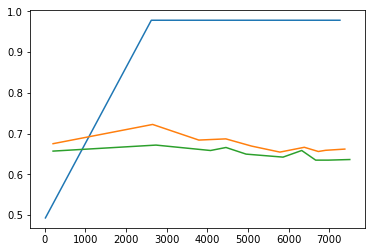

In [46]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    
    size_list = []
    accuracy_list = []
    
    vectorizer = CountVectorizer()
    transform_train = vectorizer.fit_transform(train_data)
    
    # Perform logistic regression with L1 penalty
    LR1 = LogisticRegression(penalty = 'l1').fit(transform_train, train_labels)
    
    L1_coef = pd.DataFrame(LR1.coef_)
    L1_coef.columns = vectorizer.get_feature_names()
    
    print("No of non-zero weights for L1 penalty :", len(L1_coef.loc[:, (L1_coef != 0).any(axis=0)].columns))
    
    # Perform logistic regression with L2 penalty
    LR2 = LogisticRegression(penalty = 'l2').fit(transform_train, train_labels)
    
    L2_coef = pd.DataFrame(LR2.coef_)
    L2_coef.columns = vectorizer.get_feature_names()
    
    print("No of non-zero weights for L2 penalty :", len(L2_coef.loc[:, (L2_coef != 0).any(axis=0)].columns))
    
    vectorizer2 = CountVectorizer(vocabulary = vectorizer.get_feature_names())
    transform_train2 = vectorizer2.fit_transform(train_data)
    
    # Retrain the model using features with non-zero weight and L2 penalty
    for c in np.arange(0.01, 100, 10):
        LR3 = LogisticRegression(penalty = 'l1', C = c, tol = 0.01).fit(transform_train2, train_labels)
        
        LR3_coef = pd.DataFrame(LR3.coef_)
        LR3_coef.columns = vectorizer2.get_feature_names()
        
        size_list.append(len(LR3_coef.loc[:, (LR3_coef != 0).any(axis=0)].columns))
        accuracy_list.append(metrics.accuracy_score(train_labels, LR3.predict(transform_train2)))
        
    plt.plot(size_list, accuracy_list)

    # Retrain the model using features with non-zero weight and L2 penalty

    size_list2 = []
    accuracy_list2 = []

    vectorizer3 = CountVectorizer()
    transform_train3 = vectorizer3.fit_transform(train_data)
    transform_test = CountVectorizer(vocabulary = vectorizer3.get_feature_names()).transform(test_data)

    for c in np.arange(0.1, 100, 10):
        LR4 = LogisticRegression(penalty = 'l1', C = c, tol = 0.01).fit(transform_train3, train_labels)

        LR4_coef = pd.DataFrame(LR4.coef_)
        LR4_coef.columns = vectorizer3.get_feature_names()

        size_list2.append(len(LR4_coef.loc[:, (LR4_coef != 0).any(axis=0)].columns))
        accuracy_list2.append(metrics.accuracy_score(test_labels, LR4.predict(transform_test)))

    plt.plot(size_list2, accuracy_list2)
    
    size_list3 = []
    accuracy_list3 = []

    vectorizer3 = CountVectorizer()
    transform_train3 = vectorizer3.fit_transform(train_data)
    transform_dev = CountVectorizer(vocabulary = vectorizer3.get_feature_names()).transform(dev_data)

    for c in np.arange(0.1, 100, 10):
        LR5 = LogisticRegression(penalty = 'l1', C = c, tol = 0.01).fit(transform_train3, train_labels)

        LR5_coef = pd.DataFrame(LR5.coef_)
        LR5_coef.columns = vectorizer3.get_feature_names()

        size_list3.append(len(LR5_coef.loc[:, (LR5_coef != 0).any(axis=0)].columns))
        accuracy_list3.append(metrics.accuracy_score(dev_labels, LR5.predict(transform_dev)))

    plt.plot(size_list3, accuracy_list3)
    
    ### STUDENT END ###
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

[4 pts]

In [50]:
def P7():
    ### STUDENT START ###
    tfidf_vectorizer = TfidfVectorizer()
    transform_train = tfidf_vectorizer.fit_transform(train_data)
    transform_dev = TfidfVectorizer(vocabulary = tfidf_vectorizer.get_feature_names()).fit_transform(dev_data)
    
    LR = LogisticRegression(C = 100).fit(transform_train, train_labels)
    
    result = LR.predict(transform_dev)
    probability_result = pd.DataFrame(LR.predict_proba(transform_dev))
    
    max_prob = probability_result.max(axis=1)

    correct_prob = probability_result.lookup(probability_result.index, dev_labels)
    
    ratio_R = max_prob / correct_prob
    
    j = 1
    for i in ratio_R.nlargest(3).index:
        print("Top",j, "Sample :")
        print("Predicted Class :", newsgroups_train.target_names[result[i]])
        print("Correct Class :", newsgroups_train.target_names[dev_labels[i]], "\n")
        j = j + 1
        print(dev_data[i], "\n")
    print(ratio_R.nlargest(3))
    
    ### STUDENT END ###
P7()

Top 1 Sample :
Predicted Class : comp.graphics
Correct Class : talk.religion.misc 

I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this 

ANSWER:

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

- [1 pt] for a reasonable attempt
- [2 pts] for improved performance

In [47]:
def P8():
    ### STUDENT START ###
    

    tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2)) # add bigram 
    transform_train = tfidf_vectorizer.fit_transform(train_data)
    transform_dev = TfidfVectorizer(vocabulary = tfidf_vectorizer.get_feature_names()).fit_transform(dev_data)
    
    LR = LogisticRegression(C = 0.1).fit(transform_train, \
                                         train_labels) # use stronger regularization prevent overfitting
    
    result = LR.predict(transform_dev)
    probability_result = pd.DataFrame(LR.predict_proba(transform_dev))
    
    max_prob = probability_result.max(axis=1)

    correct_prob = probability_result.lookup(probability_result.index, dev_labels)
    
    ratio_R = max_prob / correct_prob
    
    print(ratio_R.nlargest(3))

    
    ### STUDENT END ###
P8()

665    2.030424
362    1.851181
166    1.805837
dtype: float64


# Improvement made

Top 3 Error reduced from 

1. |215  |  1010.919448
2. |607   |  386.259824
3. |665    | 358.759810

to

1. |665    |2.030424
2. |362    |1.851181
3. |166    |1.805837

by using bigram and regularization.
